# Downloading and Preprocessing of Data

In [1]:
#mounted google drive onto colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from sklearn.model_selection import train_test_split

In [3]:
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation 
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [5]:
#list images will contain all the preprocessed images in the form of 100*100 2-D numpy arrays
images = []
#y_set will contain all the correct characters for each image
y_set = []
#X_set will contain all the partitioned character images(each image into 5 images) in the form of 100*20 2D numpy arrays 
X_set = []
# we have extracted all the 5 sample folders and stored all the 1000 images in a folder named 'samples'
image_folder = '/content/drive/MyDrive/samples/'        

In [6]:
#preprocessing of all the 1000 images

for filename in os.listdir(image_folder):
    # Load image in grayscale
    img = io.imread(os.path.join(image_folder, filename), as_gray = True)
    #thresholding to convert a gray scale image into a binary image. 
    threshold = threshold_otsu(img)
    img_binary = img > threshold
    #erosion of the binary image
    img_eroded = erosion(img_binary)
    #performin a last Morphological Transformations but this time the kernel is 4x1 to reduce noise further.
    kernel = np.ones((4,1), np.uint8)
    preprocessed_img = dilation(img_eroded, kernel)
    images.append(preprocessed_img)

    for i in range (5):
      y_set.append(filename[i])             
            

In [7]:
#splitting each image into 5 character images.
for image in images:
    # Split into 20-pixel wide windows
    for i in range(0, image.shape[1], 20):
        # Extract character image
        X_set.append(image[:, i:i+20]) 

In [8]:
#train-validation split of 80-20%
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)


In [9]:
X_train[0].shape

(100, 20)

In [10]:
x_train=[]
#converting the 2-D numpy array corresponding to each image into a flattend 1-D numpy array
for image in X_train:
  image=image.flatten(order='C')
  x_train.append(image)

In [11]:
#concatenating all the flattened 1-D numpy arrays of all the training set images into a single 2D numpy array
x_train_1=np.concatenate((x_train[0], x_train[1]))

for i in range(2,4000):
  x_train_1=np.concatenate((x_train_1, x_train[i]))

In [12]:
#reshaping x_train_1 so that each column corresponds to one image
x_train_1=x_train_1.reshape(4000,2000)

In [13]:
#converting all the characters to their ascii values and making a numpy array of y_train
y_train_1=[]

for y in y_train:
  y_train_1.append(ord(y))

y_train_1=np.array(y_train_1)

In [14]:
#converting the 2-D numpy array corresponding to each image into a flattend 1-D numpy array
x_test=[]

for image in X_test:
  image=image.flatten(order='C')
  x_test.append(image)


In [15]:
#concatenating all the flattened 1-D numpy arrays of all the validation/test set images into a single 2D numpy array
x_test_1=np.concatenate((x_test[0], x_test[1]))

for i in range(2,1000):
  x_test_1=np.concatenate((x_test_1, x_test[i]))

x_test_1=x_test_1.reshape(1000,2000)

In [16]:
#converting all the characters to their ascii values and making a numpy array of y_train
y_test_1=[]

for y in y_test:
  y_test_1.append(ord(y))

y_test_1=np.array(y_test_1)

# Data Visualisation(How is the data divided into classes?)

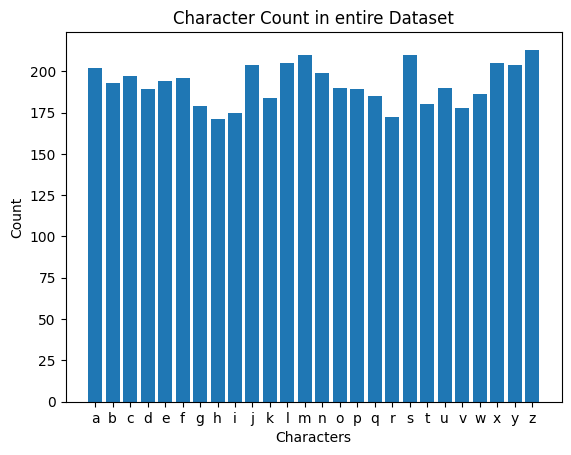

In [17]:
#plotting the frequency of all the characters as they appear in the entire dataset
from collections import Counter

# Example list of alphabetical characters
characters = y_set
# Count the occurrences of each character
character_counts = Counter(characters)

# Sort the characters in lexicographic order
sorted_characters = sorted(character_counts.keys())

# Get the corresponding counts in the sorted order
sorted_counts = [character_counts[char] for char in sorted_characters]

# Plot the graph
plt.bar(sorted_characters, sorted_counts)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.title('Character Count in entire Dataset')
plt.show()

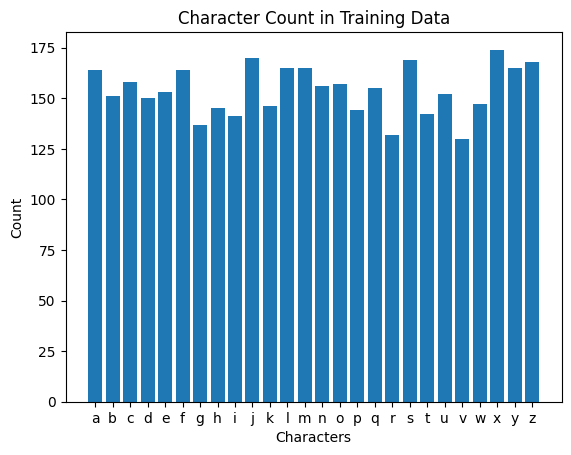

In [18]:
#plotting the frequency of all the characters as they appear in the training set
from collections import Counter

# Example list of alphabetical characters
characters = y_train
# Count the occurrences of each character
character_counts = Counter(characters)

# Sort the characters in lexicographic order
sorted_characters = sorted(character_counts.keys())

# Get the corresponding counts in the sorted order
sorted_counts = [character_counts[char] for char in sorted_characters]

# Plot the graph
plt.bar(sorted_characters, sorted_counts)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.title('Character Count in Training Data')
plt.show()

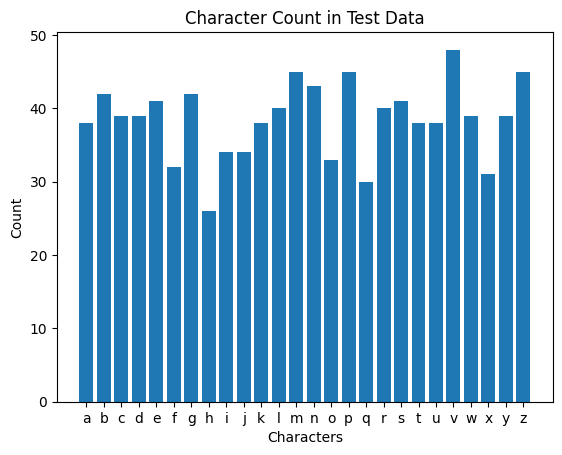

In [19]:
#plotting the frequency of all the characters as they appear in the test/validation set
characters = y_test
# Count the occurrences of each character
character_counts = Counter(characters)

# Sort the characters in lexicographic order
sorted_characters = sorted(character_counts.keys())

# Get the corresponding counts in the sorted order
sorted_counts = [character_counts[char] for char in sorted_characters]

# Plot the graph
plt.bar(sorted_characters, sorted_counts)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.title('Character Count in Test Data')
plt.show()

# Machine Learning models for OCR

# Implementation of Logistic Regression for OCR

In [20]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(fit_intercept=True, multi_class='auto', penalty= 'l1', solver= 'saga', max_iter=1000, C=50, verbose=2, n_jobs=5, tol=0.01)

In [21]:
model.fit(x_train_1,y_train_1)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 46 epochs took 229 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  3.8min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [22]:
lg_accuracy=model.score(x_test_1, y_test_1)
print("Logistic Regression Accuracy:", lg_accuracy)

Logistic Regression Accuracy: 0.575


# Q3 (for Logistic Regression)

In [23]:
# printing the presicion score, recall score and f1 score
y_pred_lg=model.predict(x_test_1)
precision_lg=precision_score(y_test_1, y_pred_lg, average='macro')
recall_lg=recall_score(y_test_1, y_pred_lg, average='macro')
f1_score_lg=f1_score(y_test_1, y_pred_lg, average='macro')

print("Logistic Regression precision score:", precision_lg)
print("Logistic Regression recall score:", recall_lg)
print("Logistic Regression F1 score:", f1_score_lg)

Logistic Regression precision score: 0.5804845986688609
Logistic Regression recall score: 0.5757125788649321
Logistic Regression F1 score: 0.5736637685258993


# Implementation of SVM for OCR 

In [24]:
# Support Vector Machine
from sklearn import svm
svm = svm.SVC()

In [30]:
model = svm.fit(x_train_1, y_train_1)

In [31]:
y_pred_svm = model.predict(x_test_1)

svm_accuracy = accuracy_score(y_test_1, y_pred_svm)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.699


# Q3 (for SVM)

In [32]:
# printing the presicion score, recall score and f1 score
precision_svm=precision_score(y_test_1, y_pred_svm, average='macro')
recall_svm=recall_score(y_test_1, y_pred_svm, average='macro')
f1_score_svm=f1_score(y_test_1, y_pred_svm, average='macro')

print("SVM precision score:", precision_svm)
print("SVM recall score:", recall_svm)
print("SVM F1 score:", f1_score_svm)

SVM precision score: 0.7329797071311385
SVM recall score: 0.7037860535519597
SVM F1 score: 0.704575123478888


# Implementation of Random Forest Classifier for OCR

In [33]:
from sklearn.metrics import confusion_matrix
# Random Forest
rf = RandomForestClassifier()

In [34]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
model_rf = rf.fit(x_train_1, y_train_1)

In [36]:
y_pred_rf = model_rf.predict(x_test_1)

rf_accuracy = accuracy_score(y_test_1, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.727


# Q3 (for Random Forest)



In [37]:
# printing the presicion score, recall score and f1 score
precision_rf=precision_score(y_test_1, y_pred_rf, average='macro')
recall_rf=recall_score(y_test_1, y_pred_rf, average='macro')
f1_score_rf=f1_score(y_test_1, y_pred_rf, average='macro')

print("Random Forest precision score:", precision_rf)
print("Random Forest recall score:", recall_rf)
print("Random Forest F1 score:", f1_score_rf)

Random Forest precision score: 0.7458681812923185
Random Forest recall score: 0.7267000725327744
Random Forest F1 score: 0.7265099406273351


In [38]:
best_accuracy = max(lg_accuracy, svm_accuracy, rf_accuracy)
best_classifier = "Logistic Regression" if lg_accuracy == best_accuracy else \
    "Support Vector Machine" if svm_accuracy == best_accuracy else "Random Forest"
print("Best accuracy: ", best_accuracy)
print("Best Classifier: ",best_classifier)

Best accuracy:  0.727
Best Classifier:  Random Forest


# Q1 

Out of the 3 algorithms implemented, we can see that the **random forest classifier** has the highest accuracy of all.

**Accuracy is not the best measure to judge the correctness of classification** algorithms. It hides certain detail that can be utilized to understand the performance of the model better. It may be misleading in various cases as given below-

1. **Multi-class target variable**: With 3 or more class labels we may get a high classification accuracy, but we can't judge wether all classes are being predicted equally well or whether certain classes are being neglected by the model.

2. **Imbalanced dataset**: When we have imbalanced data, we may achieve high accuracy but it is actually not a good score if we can get that when the model always predicts the most common class label.

We can use several other criterion for judging the performance of our classification algorithm. Some of them are: **Confusion matrix, Precision, Recall, F1 score.**

From **Confusion Matrix** we get more metrics to evaluate the model,
1. True positives: Target variable labeled as positive that are actually positive
2. False positives: Target variable labeled as positive that are actually negative
3. True negatives: Target variable labeled as negative that are actually negative
4. False negatives: Target variable labeled as negative that are actually positive

**Recall** is defined as the number of true positives divided by the total number of elements that actually belong to the positive class

**Precision** is the ratio of correct positive predictions to the total predicted positives. 

**F1 Score** is the harmonic mean of Recall and Precision.

## Q2 Hyperparameter Tuning on Random Forest

1. We increased the parameter **n_estimators**, i,e, the number of trees in the forest of the model to from the default value of **100 to 200** and it led to an increase in accuracy. However, if we increase it further, the accuracy decreased, so we have reached somwehere near the optimal value of this hyperparameter. Each decision tree in the random forest uses a random subset of features to make decisions. **By increasing the number of trees, more features and combinations of features are considered.** **This expanded exploration of feature space allows the random forest to capture a broader range of patterns and relationships in the data, leading to improved accuracy**. Moreover, Random forests work by aggregating predictions from multiple decision trees. **By increasing the number of trees, the predictions from the individual trees are averaged or aggregated.** This ensemble approach helps to **reduce the variance of the model, hence also tackling the problem of overfitting**.

2. The default value of **max_depth**, i.e, the number of splits that each decision tree is allowed to make, was none, we changed it to **19,** that led to an increase in accuracy. However, increasing beyond that value lead to a decrease in accuracy. This is because if the number of splits is too low, the model underfits the data and if it is too high the model overfits. So, using trial and error, we have somehow managed to be near the optimal value.**Deeper trees can capture more intricate patterns in the data**, potentially leading to improved accuracy. Deeper trees can **create a hierarchy of features**, and exploit them to study more complex relationships among features.By increasing max_depth, we essentially also **reduce the bias of individual decision trees** in the forest. 

In [81]:
from sklearn.metrics import confusion_matrix
# Random Forest
rf_1 = RandomForestClassifier(n_estimators=200,max_depth=19, oob_score=True, n_jobs=5)

model_rf_1 = rf_1.fit(x_train_1, y_train_1)

y_pred_rf_1 = model_rf_1.predict(x_test_1)

rf_accuracy_1 = accuracy_score(y_test_1, y_pred_rf_1)
print("Improved Random Forest Accuracy:", rf_accuracy_1)

Improved Random Forest Accuracy: 0.748


We were obtaining an **accuracy that varied between 74.5-77%** on hyperparameter tuning of the random forest classfication algorithm.

# Q4(a) Confusion Matrix using Random Forest Classifier

<Axes: >

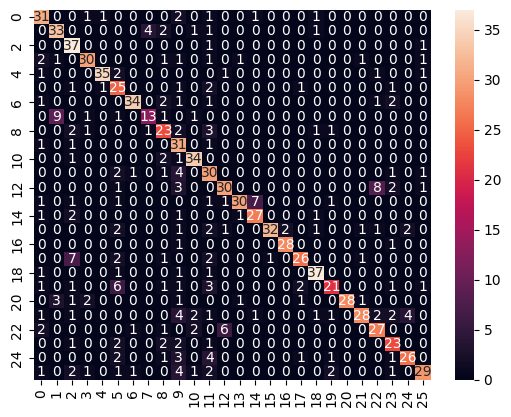

In [82]:
cm_rf=confusion_matrix(y_test_1, y_pred_rf_1)

#using heatmap from seaborn library to more descriptively and effectively depict the features of the confusion matrix
import seaborn as sns
sns.heatmap(cm_rf, annot=True)

#the labels can essentially be mapped as follows-
#a-0
#b-1
#c-3
#...
#z-25

# Q4(b) Characters with least accuracy


We have used the confusion matrix to find the accuracy for each of the characters in the dataset and then found the minimum amongst them

In [83]:
all_unique_chars = np.unique(y_test)
min = 1
min_accuracy_char = 'a'
low_accuracy_chars = []

for i in range(len(all_unique_chars)):    
    accuracy = cm_rf[i, i] / np.sum(cm_rf[i, :])
    if accuracy< min:
      min = accuracy
      min_accuracy_char = all_unique_chars[i] 
      
    if accuracy < 0.6: # an arbitrary bar we set to derive the most wrongly predicted characters
      low_accuracy_chars.append(all_unique_chars[i])

print("Characters with low accuracy:", low_accuracy_chars)
print("Character with the lowest accuracy: ", min_accuracy_char)



Characters with low accuracy: ['h', 't', 'v']
Character with the lowest accuracy:  h


# Q4(c) Reason for low accuracy
The characters predicted with the least accuracy are 'h', 't', 'v'. 

From the confusion matrix, we can clearly see that most of the times 'h' has been predicted incorectly as the character 'b'. The resemblance between the writing styles of the two characters might lead to the model classifying them in the same tree as they may appear to have the same features. Moreover, on running the Random forest model, 'h' was found to be character predicted with least accuracy a majority of the time.

Apart from this, 't' also has low accuracy because of its resemblance with 'f', it has been mispredicted most of the times as 'f' only. 



# Q5 Different Algorithms for OCR

Here we tried to implement various algorithms such as **KNN, XGBoost, Decision Trees, Stochastic Gradient Descent and Gaussian Naive Bayes**. Among these, the **KNN classifier and XGBoost classifier** gave the best accuracies of around **70%** which is **similar to what we had obtained with SVM**. 

The implementation of each of the above algorithms is given below.

## Decision Trees

Random Forest is a specific type of bagging ensemble method that uses decision trees as base models. So we wanted to try decision trees as well to see how good they performed and compare the results with what we had obtained with random forest.

It performs very poorly in comparison to random forest which seems quite obvious due to the several reasons-

1. **Decision trees are prone to overfitting**, meaning they can become too complex and memorize the training data instead of generalizing well to new data. Random Forest tackles this issue by creating multiple subsets of the training data through random sampling and builds individual decision trees on each subset.

2. Random Forest uses multiple decision trees. Each decision tree is trained independently on different subsets of the data, introducing **diversity in the modeling process**.

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_1, y_train_1)


y_pred_dt = dt_model.predict(x_test_1)


precision = precision_score(y_test_1, y_pred_dt, average='macro')
recall = recall_score(y_test_1, y_pred_dt, average='macro')
f1 = f1_score(y_test_1, y_pred_dt, average='macro')
accuracy = accuracy_score(y_test_1, y_pred_dt)

print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision score: 0.43353964662072725
Recall score: 0.42604557634680595
F1 score: 0.4256758388064373
Accuracy: 0.429


## K-Nearest Neighbours

KNN is a supervised machine learning algorithm that works by **finding the k nearest neighbors of a given data point in the feature space** on the basis of a simple distance metric such as **'euclidian distance'** which is also the default parameter and assigns the **majority class label** of those neighbors to the unlabeled data point. 

We can see that KNN actually performs as well as SVM for the task having similar accuracy.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x_train_1, y_train_1)


y_pred_knn = knn_model.predict(x_test_1)


precision = precision_score(y_test_1, y_pred_knn, average='macro')
recall = recall_score(y_test_1, y_pred_knn, average='macro')
f1 = f1_score(y_test_1, y_pred_knn, average='macro')
accuracy = accuracy_score(y_test_1, y_pred_knn)

print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision score: 0.7629026842955156
Recall score: 0.6990540020466848
F1 score: 0.7069944133059363
Accuracy: 0.698


## Stochastic Gradient Descent

Stochastic Gradient Descent works by **iteratively updating the model's parameters by computing the gradients of a loss function on a small subset of training data** called a "mini-batch."

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train_1, y_train_1)


y_pred_sgd = sgd_model.predict(x_test_1)


precision = precision_score(y_test_1, y_pred_sgd, average='macro')
recall = recall_score(y_test_1, y_pred_sgd, average='macro')
f1 = f1_score(y_test_1, y_pred_sgd, average='macro')
accuracy = accuracy_score(y_test_1, y_pred_sgd)

print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision score: 0.5537920424439866
Recall score: 0.4841937762388983
F1 score: 0.4872892487675182
Accuracy: 0.487


## Gaussian Naive Bayes

Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with the assumption of independence between features. It calculates the probability of a data point belonging to each class based on the observed features and assigns it to the class with the highest probability.

**Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that assumes the features of the dataset follow a Gaussian (normal) distribution**. It calculates the likelihood of a data point belonging to each class using the probability density function of the Gaussian distribution for each feature. The algorithm estimates the mean and variance of each feature in the training data and uses them to make predictions. 

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train_1, y_train_1)


y_pred_gnb = gnb_model.predict(x_test_1)


precision = precision_score(y_test_1, y_pred_gnb, average='macro')
recall = recall_score(y_test_1, y_pred_gnb, average='macro')
f1 = f1_score(y_test_1, y_pred_gnb, average='macro')
accuracy = accuracy_score(y_test_1, y_pred_gnb)

print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision score: 0.4575799610961366
Recall score: 0.4117058745502621
F1 score: 0.41962317588071374
Accuracy: 0.412


## XGBoost Classifier

Since random forest, which is essentially based on ensemble learning worked well, we thought of trying some other ensemble learning techniques. **Boosting is another famous ensemble method** that trains multiple base models sequentially, where each subsequent model focuses on correcting the mistakes made by the previous models. The predictions of the base models are combined using a weighted voting scheme, where more weight is given to the predictions of the more accurate models.

**XGBoost is essentially an implementation of gradient boosted trees. It boosts the performance of weak decision trees by combining them into a strong predictive model.** It optimizes a loss function through gradient descent to improve the overall performance and accuracy of the model.

It has accuracy similar to SVM.

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

In [54]:
y_train_2=[]
for i in y_train_1:
  y_train_2.append(i-97)

In [55]:
y_test_2=[]
for i in y_test_1:
  y_test_2.append(i-97)

In [56]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_1, y_train_2)

y_pred_xg_1 = xgb_model.predict(x_test_1)


precision = precision_score(y_test_2, y_pred_xg_1, average='macro')
recall = recall_score(y_test_2, y_pred_xg_1, average='macro')
f1 = f1_score(y_test_2, y_pred_xg_1, average='macro')
accuracy = accuracy_score(y_test_2, y_pred_xg_1)

print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision score: 0.6967657039799307
Recall score: 0.692974650975323
F1 score: 0.6896077598454649
Accuracy: 0.69
